In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn import svm, datasets

In [12]:
iris = datasets.load_iris() # iris 데이터 사용하네

In [13]:
x = iris.data[:,:2]
y = iris.target

C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
clf.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

In [15]:
# 커널들 끼리 비교를 해보자

# LinearSVC
clf = svm.LinearSVC(C=C, max_iter=10000)
clf.fit(x,y)
y_pred=clf.predict(x)
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

In [18]:
# radal basis function
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000) # gamma는 scale parameter
clf.fit(x,y)
y_pred=clf.predict(x)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

In [19]:
# polynomial kernel
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(x,y)
y_pred=clf.predict(x)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]], dtype=int64)

In [31]:
# 시각적 비교를 위한 함수정의 부분
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min() -1, x.max() +1
    y_min, y_max = y.min() -1, y.max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [32]:
iris = datasets.load_iris() # 또 iris 데이터 사용하네
x = iris.data[:,:2]
y = iris.target

In [33]:
C = 1.0 #regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(x,y) for clf in models)

In [34]:
titles = ('SVC with linear kernel',
           'LinearSVC (linear kernel)',
           'SVC with RBF kernel',
           'SVC with polynomial (degree 3) kernel'
           )

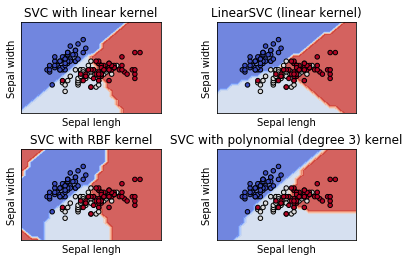

In [35]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal lengh')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()
    